# Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pyp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Q2

In [2]:
order_df = pd.read_csv('../data/order_dim.csv', delimiter='\t')
order_df.head()



,Order ID,Order Priority,Market,Ship Mode,Returned
0,ID-2011-11126,Medium,APAC,Standard Class,False
1,ID-2011-11385,Medium,APAC,Standard Class,False
2,ID-2011-12596,Medium,APAC,Standard Class,False
3,ID-2011-13114,Medium,APAC,Standard Class,False
4,ID-2011-13170,Medium,APAC,Standard Class,False


In [3]:
fact_df = pd.read_csv('../data/fact.csv', delimiter='\t')
fact_df.head()

,Row ID,Order ID,Product ID,Customer ID,Geo ID,Date ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,422,MX-2014-106901,OFF-FA-10002084,LS-17200,MX-2014-106901,MX-2014-106901,17.480000,2,0.0,0.0,1.684000
1,957,MX-2014-105921,TEC-AC-10004626,ZC-21910,MX-2014-105921,MX-2014-105921,342.079987,2,0.0,0.0,21.712999
2,1292,MX-2013-118402,OFF-BI-10001304,JM-15250,MX-2013-118402,MX-2013-118402,38.880001,2,0.0,0.0,5.923000
3,1607,MX-2013-110933,TEC-PH-10003935,SN-20560,MX-2013-110933,MX-2013-110933,186.360001,2,0.0,0.0,19.783001
4,1941,MX-2011-116246,OFF-SU-10003371,RL-19615,MX-2011-116246,MX-2011-116246,58.279999,2,0.0,0.0,8.203000


In [4]:
customer_df = pd.read_csv('../data/customer_dim.csv', delimiter='\t')
customer_df.head()

,Customer ID,Customer Name,Segment
0,AA-10315,Alex Avila,Consumer
1,AA-10375,Allen Armold,Consumer
2,AA-10480,Andrew Allen,Consumer
3,AA-10645,Anna Andreadi,Consumer
4,AA-315,Alex Avila,Consumer


In [5]:
geo_df = pd.read_csv('../data/geo_dim.csv', delimiter='\t')
geo_df.head()

,Geo ID,City,State,Country,Region
0,CA-2013-159016,Los Angeles,California,United States,West
1,CA-2012-149846,Los Angeles,California,United States,West
2,CA-2011-106726,Los Angeles,California,United States,West
3,US-2013-116729,Los Angeles,California,United States,West
4,CA-2014-133865,Los Angeles,California,United States,West


In [6]:
product_df = pd.read_csv('../data/product_dim.csv', delimiter='\t')
product_df.head()

,Product ID,Product Name,Category,Sub-Category
0,OFF-EAT-10000522,"Eaton Computer Printout Paper, Multicolor",Office Supplies,Paper
1,OFF-EAT-10000652,"Eaton Computer Printout Paper, 8.5 x 11",Office Supplies,Paper
2,OFF-EAT-10000820,"Eaton Message Books, Multicolor",Office Supplies,Paper
3,OFF-EAT-10000854,"Eaton Parchment Paper, Recycled",Office Supplies,Paper
4,OFF-EAT-10001025,"Eaton Note Cards, Multicolor",Office Supplies,Paper


In [7]:
df = fact_df.set_index("Product ID", drop= False).join(product_df.set_index("Product ID", drop= False), rsuffix= "_product")\
              .set_index("Order ID", drop= False).join(order_df.set_index("Order ID", drop= False), rsuffix= "_order")\
              .set_index("Geo ID", drop= False).join(geo_df.set_index("Geo ID", drop= False), rsuffix = "_geo")\
              .set_index("Customer ID", drop= False).join(customer_df.set_index("Customer ID", drop= False), rsuffix = "_customer")
df.head(5)

,Row ID,Order ID,Product ID,Customer ID,Geo ID,Date ID,Sales,Quantity,Discount,Profit,...,Ship Mode,Returned,Geo ID_geo,City,State,Country,Region,Customer ID_customer,Customer Name,Segment
Customer ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,33527,CA-2011-128055,OFF-AP-10002765,AA-10315,CA-2011-128055,CA-2011-128055,52.980000,2,0.0,14.834400,...,Standard Class,False,CA-2011-128055,San Francisco,California,United States,West,AA-10315,Alex Avila,Consumer
AA-10315,33526,CA-2011-128055,OFF-BI-10004390,AA-10315,CA-2011-128055,CA-2011-128055,673.567993,2,0.2,252.587997,...,Standard Class,False,CA-2011-128055,San Francisco,California,United States,West,AA-10315,Alex Avila,Consumer
AA-10315,38766,CA-2011-138100,FUR-FU-10002456,AA-10315,CA-2011-138100,CA-2011-138100,14.560000,2,0.0,6.260800,...,Standard Class,False,CA-2011-138100,New York City,New York,United States,East,AA-10315,Alex Avila,Consumer
AA-10315,38765,CA-2011-138100,OFF-PA-10000349,AA-10315,CA-2011-138100,CA-2011-138100,14.940000,3,0.0,7.021800,...,Standard Class,False,CA-2011-138100,New York City,New York,United States,East,AA-10315,Alex Avila,Consumer
AA-10315,32596,CA-2012-121391,OFF-ST-10001590,AA-10315,CA-2012-121391,CA-2012-121391,26.959999,2,0.0,7.009600,...,First Class,False,CA-2012-121391,San Francisco,California,United States,West,AA-10315,Alex Avila,Consumer


In [8]:
X = df.drop(['Profit', 'Row ID', 'Order ID', 'Product ID', 'Customer ID', 'Geo ID', 'Date ID',\
    'Product ID_product', 'Product Name', 'Order ID_order', 'Geo ID_geo', 'City', 'State',\
    'Customer ID_customer', 'Customer Name', 'Ship Mode'], axis=1)
X.reset_index(inplace = True)
X

,Customer ID,Sales,Quantity,Discount,Shipping Cost,Category,Sub-Category,Order Priority,Market,Returned,Country,Region,Segment
0,AA-10315,52.980000,2,0.000,3.170000,Office Supplies,Appliances,Medium,US,False,United States,West,Consumer
1,AA-10315,673.567993,2,0.200,54.959999,Office Supplies,Binders,Medium,US,False,United States,West,Consumer
2,AA-10315,14.560000,2,0.000,1.310000,Furniture,Furnishings,Medium,US,False,United States,East,Consumer
3,AA-10315,14.940000,3,0.000,0.990000,Office Supplies,Paper,Medium,US,False,United States,East,Consumer
4,AA-10315,26.959999,2,0.000,5.230000,Office Supplies,Storage,Critical,US,False,United States,West,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,ZD-21925,1127.810059,3,0.200,72.709999,Furniture,Chairs,Medium,EU,False,Germany,Central,Consumer
49666,ZD-21925,87.984001,2,0.400,9.110000,Furniture,Furnishings,Low,LATAM,True,Mexico,North,Consumer
49667,ZD-21925,872.320007,2,0.000,68.222000,Technology,Phones,High,LATAM,False,Brazil,South,Consumer
49668,ZD-21925,590.117004,3,0.002,106.680000,Technology,Copiers,Critical,LATAM,False,Mexico,North,Consumer


In [9]:
#  Scale the features using MinMaxScaler or StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from flaml import AutoML
from sklearn.decomposition import PCA

In [10]:
# Standardization and Normalization

cat_Column_list = ['Customer ID', 'Category', 'Sub-Category', 'Order Priority', 'Market', 'Returned', 'Country', 'Region', 'Segment']
cat_X = X[cat_Column_list]
Numerical_X = X.drop(cat_Column_list, axis=1)

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(Numerical_X)
min_max_scaled = min_max_scaler.transform(Numerical_X)
min_max_scaled_df = pd.DataFrame(min_max_scaled, columns=Numerical_X.columns)

std_scaler = StandardScaler()

std_scaler.fit(min_max_scaled_df)
scaled = std_scaler.transform(min_max_scaled_df)
scaled_df = pd.DataFrame(scaled, columns= min_max_scaled_df.columns)

In [11]:
scaled_df = pd.concat([scaled_df, cat_X], axis = 1)

In [12]:
scaled_df

,Sales,Quantity,Discount,Shipping Cost,Customer ID,Category,Sub-Category,Order Priority,Market,Returned,Country,Region,Segment
0,-0.392751,-0.646548,-0.674717,-0.402167,AA-10315,Office Supplies,Appliances,Medium,US,False,United States,West,Consumer
1,0.884289,-0.646548,0.268484,0.508511,AA-10315,Office Supplies,Binders,Medium,US,False,United States,West,Consumer
2,-0.471811,-0.646548,-0.674717,-0.434873,AA-10315,Furniture,Furnishings,Medium,US,False,United States,East,Consumer
3,-0.471029,-0.206955,-0.674717,-0.440500,AA-10315,Office Supplies,Paper,Medium,US,False,United States,East,Consumer
4,-0.446294,-0.646548,-0.674717,-0.365944,AA-10315,Office Supplies,Storage,Critical,US,False,United States,West,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,1.819024,-0.206955,0.268484,0.820628,ZD-21925,Furniture,Chairs,Medium,EU,False,Germany,Central,Consumer
49666,-0.320720,-0.646548,1.211685,-0.297718,ZD-21925,Furniture,Furnishings,Low,LATAM,True,Mexico,North,Consumer
49667,1.293279,-0.646548,-0.674717,0.741711,ZD-21925,Technology,Phones,High,LATAM,False,Brazil,South,Consumer
49668,0.712565,-0.206955,-0.665285,1.417958,ZD-21925,Technology,Copiers,Critical,LATAM,False,Mexico,North,Consumer


In [13]:
# Split the dataset into training and testing sets
y = df['Ship Mode']
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [15]:
amlmodel = AutoML(task= "classification", time_budget= 60, verbose=0)
amlmodel.fit(X_train, y_train)
y_pred = amlmodel.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
#f1_score(y_test, y_pred)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is

array([[ 502,   28,  183,  741],
       [ 135,   57,   79,  279],
       [ 191,   14,  366, 1404],
       [  75,    9,  156, 5715]], dtype=int64)

In [16]:
f1_score(y_test, y_pred, average='micro')

0.6684115160056372

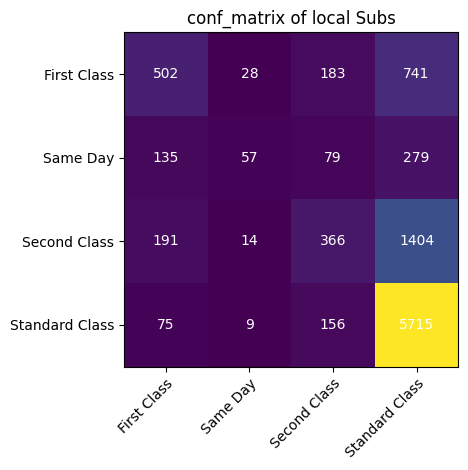

In [17]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

Subs = ['First Class', 'Same Day', 'Second Class', 'Standard Class']


fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Subs)), labels=Subs)
ax.set_yticks(np.arange(len(Subs)), labels=Subs)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Subs)):
    for j in range(len(Subs)):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("conf_matrix of local Subs")
fig.tight_layout()
fig.c
plt.show()

In [25]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, y_pred)
print(class_rep)

                precision    recall  f1-score   support

   First Class       0.15      0.09      0.11      1483
      Same Day       0.06      0.01      0.02       539
  Second Class       0.19      0.07      0.11      1986
Standard Class       0.60      0.82      0.69      5926

      accuracy                           0.52      9934
     macro avg       0.25      0.25      0.23      9934
  weighted avg       0.42      0.52      0.45      9934



# Ezafat

In [18]:
# Without PCA
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=313)

In [19]:
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)
y_pred = lrmodel.predict(x_test)
r2_score(y_test, y_pred)

ValueError: could not convert string to float: 'Technology'

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

## PCA

In [ ]:
# PCA transformation
pca_transformer = PCA(n_components=0.99, svd_solver = 'auto')
pca_transformer.fit(scaled_df)
reduced_X = pca_transformer.transform(scaled_df)
reduced_X

In [ ]:
#  Use PCA for feature dimensionality reduction
pca = PCA(n_components=2)  #
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# Train the model on the reduced feature set
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

In [ ]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, y_train)
y_pred = lgmodel.predict(X_test)
confusion_matrix(y_test, y_pred)
f1_score(y_test, y_pred)